In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.9MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train=keras.utils.image_dataset_from_directory(directory='/content/train', labels='inferred', label_mode='int', batch_size=32,image_size=(256,256))
validation=keras.utils.image_dataset_from_directory(directory='/content/test', labels='inferred', label_mode='int', batch_size=32,image_size=(256,256))


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
train=train.map(process)
validation=validation.map(process)

In [ ]:
# create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 1.6360 - val_accuracy: 0.7686
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 1.5328 - val_accuracy: 0.7750
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0276 - accuracy: 0.9923 - val_loss: 1.3959 - val_accuracy: 0.7586
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 1.4858 - val_accuracy: 0.7532
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 1.8005 - val_accuracy: 0.7668
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 1.5878 - val_accuracy: 0.7574
Epoch 7/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 1.6009 - val_accuracy:

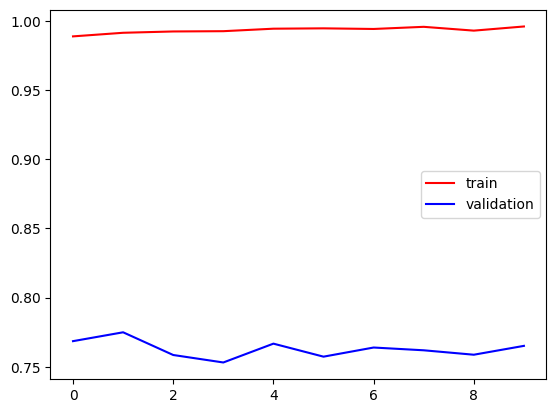

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

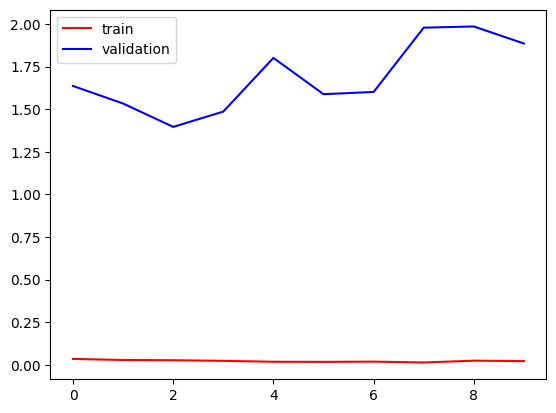

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# There is a big difference in the train and test accuracy score and loss
# hence the model is overfitting the data

# Stopping Overfitting

In [ ]:
# create CNN model
model2=Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1,activation='sigmoid'))



In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# New Section

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
history=model2.fit(train,epochs=10,validation_data=validation)

Epoch 1/10
625/625 [==============================] - 73s 110ms/step - loss: 1.4983 - accuracy: 0.5777 - val_loss: 0.6559 - val_accuracy: 0.6588
Epoch 2/10
625/625 [==============================] - 69s 111ms/step - loss: 0.5739 - accuracy: 0.6992 - val_loss: 0.5123 - val_accuracy: 0.7568
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4798 - accuracy: 0.7714 - val_loss: 0.4688 - val_accuracy: 0.7822
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4217 - accuracy: 0.8074 - val_loss: 0.4878 - val_accuracy: 0.7634
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3716 - accuracy: 0.8386 - val_loss: 0.5484 - val_accuracy: 0.7570
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2984 - accuracy: 0.8706 - val_loss: 0.4251 - val_accuracy: 0.8112
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2327 - accuracy: 0.9013 - val_loss: 0.6089 - val_ac

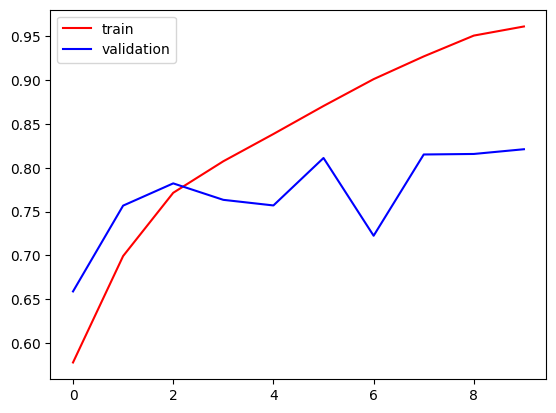

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

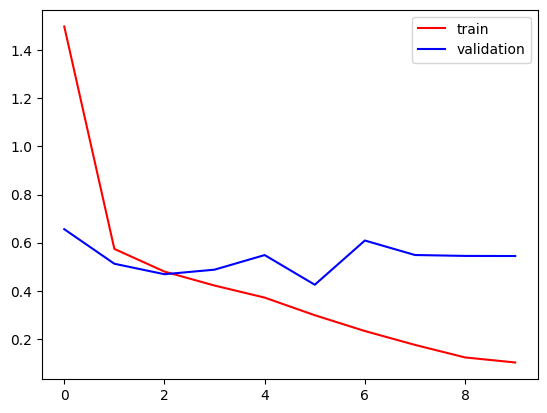

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# increasing data size using data augmentataion

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_gen=ImageDataGenerator(rotation_range=30,shear_range=30,zoom_range=15,horizontal_flip=True)


In [ ]:
train_ds=data_gen.flow_from_directory('train',class_mode='binary')

Found 20000 images belonging to 2 classes.


In [ ]:
# create CNN model
model3=Sequential()

model3.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model3.add(Flatten())

model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(1,activation='sigmoid'))



In [ ]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
history=model3.fit_generator(train_ds,epochs=10,validation_data=validation,steps_per_epoch=600,workers=-1)

<ipython-input-45-bf9a2d43f38b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model3.fit_generator(train_ds,epochs=10,validation_data=validation,steps_per_epoch=600,workers=-1)


Epoch 1/10
600/600 [==============================] - 394s 655ms/step - loss: 0.7528 - accuracy: 0.5098 - val_loss: 6.3651 - val_accuracy: 0.5000
Epoch 2/10
336/600 [===============>..............] - ETA: 2:49 - loss: 0.7213 - accuracy: 0.5136

KeyboardInterrupt: 